# Histogram of age at entry distribution for males and females

This notepad looks at the distribution of the age at entry of both males and females. The goal is to get a general idea of how the age of patients at entry are distributed. Furthermore, we investigate if there is a significant difference between the age at which males and females get diagnosed.
## Import required packages

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Import demographics data

In [3]:
# Demographics DataFrame
demo_df = pd.read_excel('../data/demographics and Biologics data.xlsx')

print('Number of patients in demographics data :', len(demo_df['patient_id'].unique()))
print('Shape of the dataset: ',demo_df.shape)
demo_df.head()

Number of patients in demographics data : 721
Shape of the dataset:  (721, 10)


,patient_id,patient_gender_id,patient_date_of_diagnosis,Age at diagnosis,patient_hla_bUnknown7_id,EIBP,patient_condition_subtype,Current biologic,Number of biologics used (not including brand/biosimilar switch),year of Birth
0,40,Female,1994-01-01,46.255989,Positive,False,AS,Infliximab,1.0,1947
1,41,Male,2003-01-01,46.644764,Positive,False,AS,Adalimumab,1.0,1956
2,43,Male,1978-01-01,20.410678,Positive,False,AS,Adalimumab,1.0,1957
3,44,Male,1994-01-01,22.047912,Unknown,False,AS,Adalimumab,1.0,1971
4,45,Male,1998-01-01,37.048597,Positive,False,AS,Etanercept,1.0,1960


## Drop missing values

In [4]:
demo_df.dropna(how='any',inplace=True)
print('Updated shape : ',demo_df.shape)
demo_df.head()

Updated shape :  (677, 10)


,patient_id,patient_gender_id,patient_date_of_diagnosis,Age at diagnosis,patient_hla_bUnknown7_id,EIBP,patient_condition_subtype,Current biologic,Number of biologics used (not including brand/biosimilar switch),year of Birth
0,40,Female,1994-01-01,46.255989,Positive,False,AS,Infliximab,1.0,1947
1,41,Male,2003-01-01,46.644764,Positive,False,AS,Adalimumab,1.0,1956
2,43,Male,1978-01-01,20.410678,Positive,False,AS,Adalimumab,1.0,1957
3,44,Male,1994-01-01,22.047912,Unknown,False,AS,Adalimumab,1.0,1971
4,45,Male,1998-01-01,37.048597,Positive,False,AS,Etanercept,1.0,1960


## Plot histogram of age distribution

This plot shows the distribution of the age of entry into the study. It gives a general idea of when patients were diagnosed. 

Text(0,0.5,'Prob')

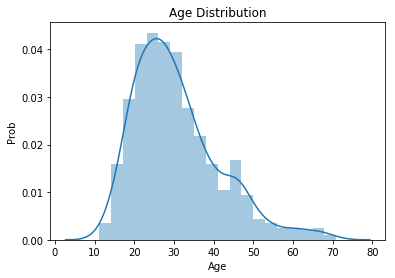

In [5]:
age_at_entry = demo_df['Age at diagnosis'].values

ax = sns.distplot(age_at_entry)
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Prob')

                0
count  677.000000
mean    30.657171
std     10.847318
min     11.156742
25%     22.803559
50%     28.383299
75%     36.030116
max     70.904860


[Text(0,0,'Age at entry')]

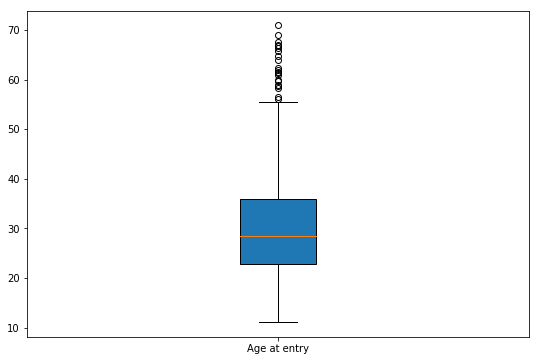

In [6]:
# Insert a boxplot
five_point_summary = pd.DataFrame(age_at_entry).describe()
print(five_point_summary)
f = plt.figure(1, figsize=(9, 6))
a = f.add_subplot(111)
bp = a.boxplot(age_at_entry, patch_artist=True)
a.set_xticklabels(['Age at entry'])

It is observed that the age distribution is slightly positively skewed. Furthermore, the modal age at entry is approximately 25 years. This is younger than expected (by me at least). 

## Age distribution by gender

We now plot the distribution of age at entry stratified across gender. 

Text(0,0.5,'Probability')

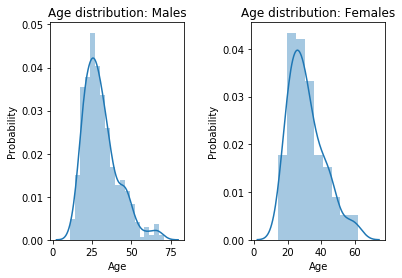

In [7]:
genders = demo_df['patient_gender_id']
# Get male and female index
male_ids = demo_df[genders == 'Male']['patient_id']
female_ids = demo_df[genders == 'Female']['patient_id']

# Get demographics about males and females
male_demo_df = demo_df[demo_df['patient_id'].isin(male_ids)]
female_demo_df = demo_df[demo_df['patient_id'].isin(female_ids)]

# Plot age at entry distribution for males and females
age_at_entry_male = male_demo_df['Age at diagnosis'].values
age_at_entry_female = female_demo_df['Age at diagnosis'].values

fig, ax_2 = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.5)
sns.distplot(age_at_entry_male, ax = ax_2[0])
ax_2[0].set_title('Age distribution: Males')
ax_2[0].set_xlabel('Age')
ax_2[0].set_ylabel('Probability')
sns.distplot(age_at_entry_female, ax = ax_2[1] )
ax_2[1].set_title('Age distribution: Females')
ax_2[1].set_xlabel('Age')
ax_2[1].set_ylabel('Probability')

It is seen that the shape of the two histograms are similar. Hence, there is not a massive difference between the age at entry of males and females. Notice that females are diagnosed at an earlier stage than males, although this is only a marginal difference.